# Take home Assignment

We have solved before a problem, where we had implemented linear regression with one feature and one target. 

However, in the real world, most machine learning problems require us to work with more than one feature.

We will now consider the home loan approval dataset, where we will calculate an individual’s home loan eligibility, depending not only on the age of the person but also on the credit rating and other features.

Therefore in order to determine  whether or not a person should be eligible for a home loan, you’ll have to collect multiple features, such as age, income, credit rating, number of dependents, etc.

You have to work on this multiple regression

# Step 1: Import necessary libraries

In [2]:
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt                                                 
from sklearn import datasets, linear_model ,
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error       

# Step 2: Reading the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mona-patra/FDP-5days/main/Day%202/loan-approval-dataset.csv")
df

,age,credit-rating,children,loan-approval
0,19,27.900,0,16884.92400
1,18,42.130,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


# Step 3: Understanding the dataset, finding shape of the dataset, info on the dataset, correlation among the variables etc.

In [4]:
df.head()

,age,credit-rating,children,loan-approval
0,19,27.900,0,16884.92400
1,18,42.130,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [5]:
df.columns

Index(['age', 'credit-rating', 'children', 'loan-approval'], dtype='object')

In [6]:
df.shape

(1338, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   credit-rating  1338 non-null   float64
 2   children       1338 non-null   int64  
 3   loan-approval  1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [8]:
df.describe()

,age,credit-rating,children,loan-approval
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.669645,1.094918,13270.422265
std,14.049960,6.105650,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='plasma')

,age,credit-rating,children,loan-approval
age,1.000000,0.107593,0.042469,0.299008
credit-rating,0.107593,1.000000,0.012663,0.197122
children,0.042469,0.012663,1.000000,0.067998
loan-approval,0.299008,0.197122,0.067998,1.000000


<AxesSubplot:>

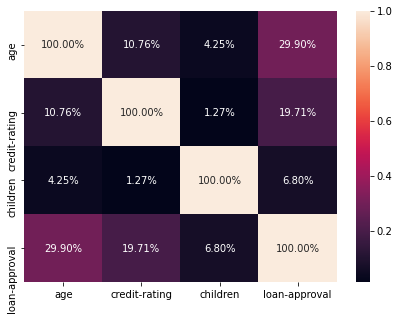

In [10]:
import seaborn as sns
plt.figure(figsize = (7,5))
sns.heatmap(corr,annot = True,fmt='.2%')

# Step 4: Defining the feature and the target variable, X and y, where

In [11]:
X = df[['age','credit-rating','children']]
y = df['loan-approval']

In [12]:
X.head()

,age,credit-rating,children
0,19,27.900,0
1,18,42.130,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [13]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: loan-approval, dtype: float64

# Step 5:  Create Train and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
# Take a look at the splittted dataset
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1338, 3)
(1338,)
(936, 3)
(402, 3)
(936,)
(402,)


# Step 6: Train your model

In [37]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [40]:
regr.coef_

array([250.20504314, 301.42340575, 520.34313128])

In [41]:
regr.intercept_

-6466.22119199591

In [42]:
# Predicting y_value using teting data of X
y_pred = regr.predict(X_test)

# Creating residuals from the y_train and y_pred
res = (y_test - y_pred)

# Step 7: Evaluate the model

In [43]:
import warnings
warnings.filterwarnings('ignore')

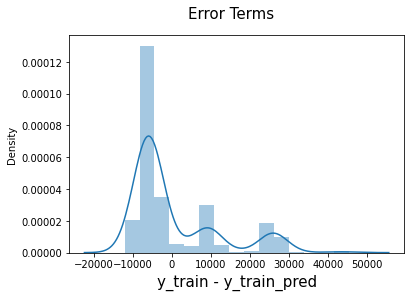

In [44]:
import seaborn as sns
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [45]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_pred)
r_squared

0.10995726547136453

In [46]:
# Mean square error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f'% mean_absolute_error(y_test, y_pred))

Mean squared error: 129232148.96
Mean Absolute Error: 8899.63
